In [2]:
import numpy as np # линейная алгебра
import seaborn as sns # визуализация

import math # математические функции
import random # генерация случайных чисел

# Лабораторная работа №4

# Геерация случайных векторов

# Задание на лабораторную работу:
# Реализовать методы Бокса-Мюллера, Метрополиса-Гастинга и Гиббсона

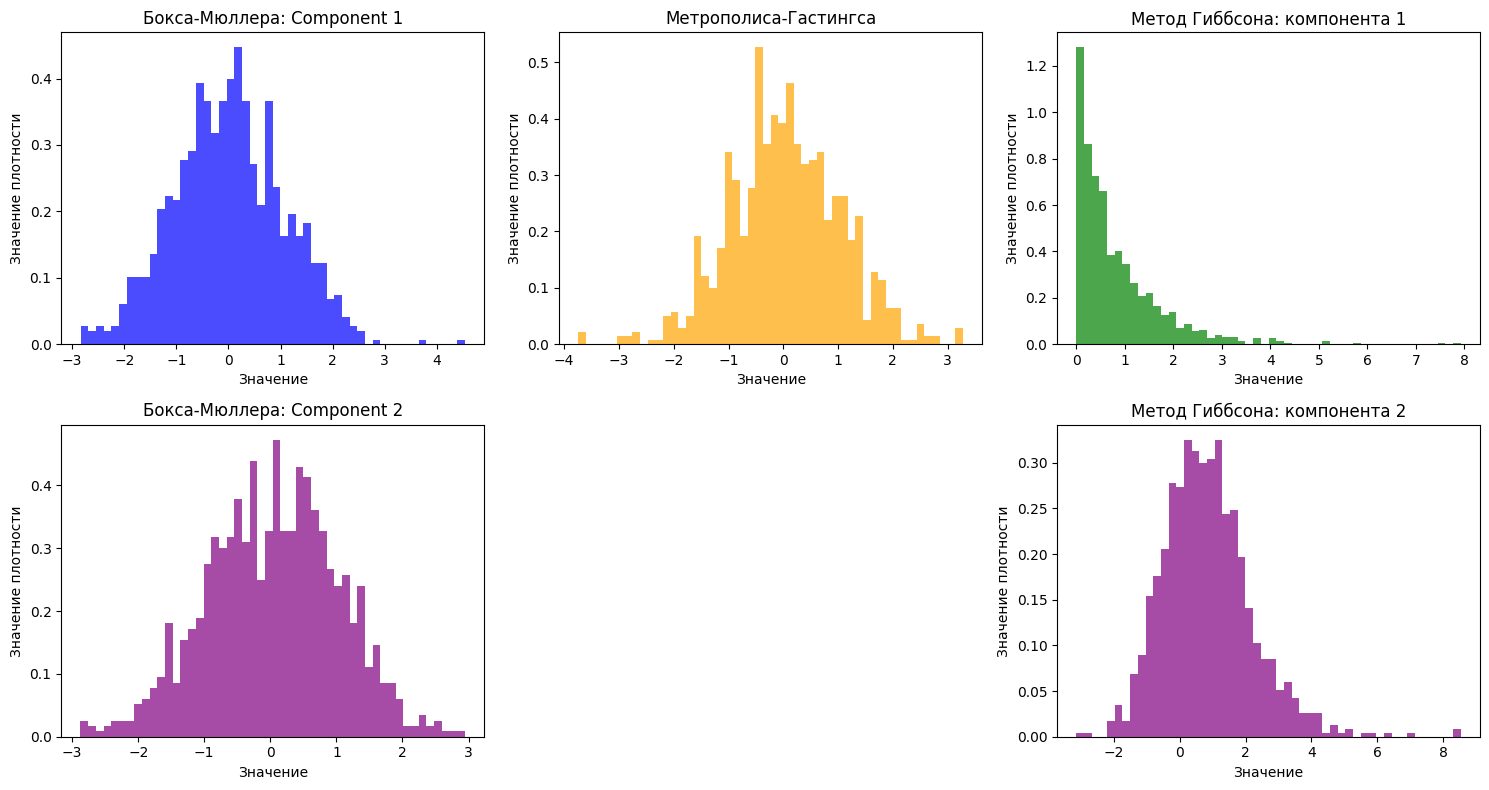

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon # экспоненциальное распределение

# Принци данного метода: если у нас есть плотность распределения, то мы можем сгенерировать случайную величину с этим распределением. Для этого нам нужно сгенерировать 
# случайную величину с равномерным распределением на отрезке [0, 1] и подставить ее в обратную функцию распределения. Таким образом, мы получим случайную величину с нужным распределением.
def box_muller(n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)

    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    return z0, z1

# Принципп даного метода: мы можем сгенерировать случайную величину с нужным распределением, если у нас есть плотность распределения. Для этого мы можем сгенерировать
# случайную величину с другим распределением, которое нам известно, и с помощью этой случайной величины и плотности распределения, которую мы хотим получить, так мы можем
# сгенерировать случайную величину с нужным распределением.
def metropolis_hastings(iterations):
    smpl = [np.random.normal()] # Случайная величина с нормальным распределением

    for _ in range(iterations):
        candidate = np.random.normal(loc=smpl[-1], scale=1.0) # Случайная величина с нормальным распределением
        accpt_rat = min(1, np.exp(-0.5 * (candidate**2 - smpl[-1]**2))) # Плотность распределения нормального распределения

        if np.random.rand() < accpt_rat:
            smpl.append(candidate)
        else:
            smpl.append(smpl[-1])

    return np.array(smpl)

# Принципп даного метода: мы можем сгенерировать случайную величину с нужным распределением, если у нас есть плотность распределения. Для этого мы можем сгенерировать
# случайную величину с другим распределением, которое нам известно, и с помощью этой случайной величины и плотности распределения, которую мы хотим получить, так мы можем
# сгенерировать случайную величину с нужным распределением.
def gibbs_sampling(iterations):
    smpl = np.zeros((iterations, 2)) # Матрица для хранения значений

    for i in range(1, iterations):
        smpl[i, 0] = np.random.exponential(scale=1.0 / max(smpl[i - 1, 1], 1)) # Случайная величина с экспоненциальным распределением
        smpl[i, 1] = np.random.normal(loc=smpl[i, 0], scale=1.0) # Случайная величина с нормальным распределением

    return smpl # Возвращаем матрицу

# Беру тысячу итраций
iterations = 1000

# Метод Бокса-Мюллера
z0, z1 = box_muller(iterations)

# Метод Метрополиса-Гастингса
metropolis_smpl = metropolis_hastings(iterations)

# Метод Гибсона
gibbs_smpl = gibbs_sampling(iterations)

# Построинм гистограммы для каждого метода
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.hist(z0, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Бокса-Мюллера: Component 1')
plt.xlabel('Значение')
plt.ylabel('Значение плотности')

plt.subplot(2, 3, 4)
plt.hist(z1, bins=50, density=True, alpha=0.7, color='purple')
plt.title('Бокса-Мюллера: Component 2')
plt.xlabel('Значение')
plt.ylabel('Значение плотности')

plt.subplot(2, 3, 2)
plt.hist(metropolis_smpl, bins=50, density=True, alpha=0.7, color='orange')
plt.title('Метрополиса-Гастингса')
plt.xlabel('Значение')
plt.ylabel('Значение плотности')

plt.subplot(2, 3, 3)
plt.hist(gibbs_smpl[:, 0], bins=50, density=True, alpha=0.7, color='green')
plt.title('Метод Гиббсона: компонента 1')
plt.xlabel('Значение')
plt.ylabel('Значение плотности')

plt.subplot(2, 3, 6)
plt.hist(gibbs_smpl[:, 1], bins=50, density=True, alpha=0.7, color='purple')
plt.title('Метод Гиббсона: компонента 2')
plt.xlabel('Значение')
plt.ylabel('Значение плотности')

plt.tight_layout()
plt.show()
